In [ ]:
import tiny_ball_detector as tbd


tbd.models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


def gaussian_kernel(size, variance):
    x, y = tf.meshgrid(
        tf.range(-size, size + 1, dtype=tf.float32),
        tf.range(-size, size + 1, dtype=tf.float32),
    )
    g = tf.exp(-(x**2 + y**2) / float(2 * variance))
    return g


def create_gaussian(size, variance):
    gaussian_kernel_array = gaussian_kernel(size, variance)
    gaussian_kernel_array = gaussian_kernel_array * 255
    gaussian_kernel_array = tf.cast(gaussian_kernel_array, dtype=tf.uint8)
    return gaussian_kernel_array


print(create_gaussian(5, 1))
plt.imshow(create_gaussian(5, 1), cmap="hot", interpolation="nearest")

In [1]:
%load_ext autoreload
%autoreload 1

In [3]:
import os
import tensorflow as tf

In [1]:
from logging import DEBUG
import logging
from pathlib import Path
from tiny_ball_detector.dataset.tracknet_dataset import TrackNetDataset

logger = logging.getLogger("FrameGeneratorLogger")

trackNetDataset = TrackNetDataset(
    path=Path("../data/tennis"), n_frames=3, logger=logger
)

2025-02-16 15:27:44.678497: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-16 15:27:44.686502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739716064.696217   68614 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739716064.698943   68614 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-16 15:27:44.708958: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
trackNetDataset.dataset

Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead


I0000 00:00:1739711192.237461   56353 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9579 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:05:00.0, compute capability: 8.6


<_FlatMapDataset element_spec=(TensorSpec(shape=(3, 720, 1280, 3), dtype=tf.float32, name=None), TensorSpec(shape=(3, 720, 1280, 1), dtype=tf.float32, name=None))>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

images = []
for i in trackNetDataset.dataset.take(50).unbatch():
    rgb_pil = Image.fromarray(i[0].numpy().astype(np.uint8))
    grayscale_pil = Image.fromarray(i[1].numpy().astype(np.uint8).squeeze(), mode="L")

    rgb_pil = rgb_pil.convert("RGBA")
    grayscale_pil = grayscale_pil.convert("RGBA")
    alpha = 170  # Transparence (0 = totalement transparent, 255 = opaque)
    grayscale_pil.putalpha(alpha)

    combined = Image.alpha_composite(rgb_pil, grayscale_pil)
    images.append(combined)

images[0].save(
    "animated.gif", save_all=True, append_images=images[1:], duration=20, loop=0
)

📌 Number of clips found: 95
2025-02-16 14:06:34.647969: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [2]:
trackNetDataset.make_ground_truth_image()

📌 Number of clips found: 95
I0000 00:00:1739709855.555333   46904 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9645 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:05:00.0, compute capability: 8.6


Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


2025-02-16 13:44:16.182661: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-02-16 13:44:16.461487: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-02-16 13:44:17.085699: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-02-16 13:44:18.529518: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-02-16 13:44:22.423910: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-02-16 13:44:30.802507: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-02-16 13:44:48.086589: I tensorflow/core/framework/local_rendezvous.cc:405] L

In [2]:
for i in trackNetDataset.dataset.take(2):
    print(i[0].shape, i[1].shape)

Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead


I0000 00:00:1739716068.726894   68614 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9559 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:05:00.0, compute capability: 8.6
📌 Number of clips found: 95


(720, 1280, 9) (720, 1280, 1)
(720, 1280, 9) (720, 1280, 1)


2025-02-16 15:27:49.463436: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [2]:
from logging import DEBUG
import logging
from pathlib import Path
from tiny_ball_detector.dataset.tracknet_dataset import TrackNetDataset

logger = logging.getLogger("FrameGeneratorLogger")

trackNetDataset = TrackNetDataset(
    path=Path("../data/tennis"), n_frames=3, logger=logger
)

2025-02-16 16:29:18.472736: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-16 16:29:18.482935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739719758.494777  110821 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739719758.497783  110821 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-16 16:29:18.509043: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [4]:
i = 0
for _ in trackNetDataset.dataset:
    i += 1

print(i)

📌 Number of clips found: 95
2025-02-16 16:29:41.093175: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-02-16 16:29:48.165093: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-02-16 16:30:07.826540: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-02-16 16:30:50.427891: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


6580


In [5]:
from tensorflow.keras import backend as K
K.clear_session()


In [11]:
from tiny_ball_detector.models import TrackerNet
import keras

from logging import DEBUG
import logging
from pathlib import Path
from tiny_ball_detector.dataset.tracknet_dataset import TrackNetDataset
import tensorflow as tf


def resize(image, label):
    return (
        keras.preprocessing.image.smart_resize(image, (360, 640)),
        keras.preprocessing.image.smart_resize(label, (360, 640)),
    )


logger = logging.getLogger("FrameGeneratorLogger")

trackNetDataset = TrackNetDataset(
    path=Path("../data/tennis"), n_frames=3, logger=logger
)


tracknet_model = TrackerNet()

tracknet_model.compile(loss=keras.losses.SparseCategoricalCrossentropy())

tracknet_model.fit(
    trackNetDataset.dataset.map(resize, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(3)
    .prefetch(tf.data.AUTOTUNE),
    epochs=10,
)

2194/2194 ━━━━━━━━━━━━━━━━━━━━ 468s 213ms/step - loss: 0.0021
Epoch 7/10


2025-02-16 19:23:08.670377: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7309651420809925136
📌 Number of clips found: 95


1553/2194 ━━━━━━━━━━━━━━━━━━━━ 2:19 218ms/step - loss: 0.0020

2025-02-16 19:28:47.448379: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 44236800 bytes after encountering the first element of size 44236800 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1585/2194 ━━━━━━━━━━━━━━━━━━━━ 2:12 218ms/step - loss: 0.0020

2025-02-16 19:28:54.293311: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 44236800 bytes after encountering the first element of size 44236800 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


2194/2194 ━━━━━━━━━━━━━━━━━━━━ 480s 219ms/step - loss: 0.0019
Epoch 8/10


2025-02-16 19:31:08.419149: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7309651420809925136
📌 Number of clips found: 95


2194/2194 ━━━━━━━━━━━━━━━━━━━━ 454s 207ms/step - loss: 0.0018
Epoch 9/10


2025-02-16 19:38:42.759156: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7309651420809925136
📌 Number of clips found: 95


1493/2194 ━━━━━━━━━━━━━━━━━━━━ 2:20 200ms/step - loss: 0.0017

2025-02-16 19:43:41.830692: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 44236800 bytes after encountering the first element of size 44236800 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


2194/2194 ━━━━━━━━━━━━━━━━━━━━ 449s 205ms/step - loss: 0.0016
Epoch 10/10


2025-02-16 19:46:11.898350: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 7309651420809925136
📌 Number of clips found: 95


 334/2194 ━━━━━━━━━━━━━━━━━━━━ 6:37 214ms/step - loss: 0.0016

2025-02-16 19:47:23.611284: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2194/2194 ━━━━━━━━━━━━━━━━━━━━ 479s 218ms/step - loss: 0.0016


In [12]:
tracknet_model.save('tracknet.keras')

In [13]:
image, label = next(iter(trackNetDataset.dataset.take(1).map(resize).batch(1)))

📌 Number of clips found: 95
2025-02-16 19:55:11.140838: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 44236800 bytes after encountering the first element of size 44236800 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


In [ ]:
tf.reduce_max(tracknet_model(image), axis=-1, keepdims=True)[0]

<tf.Tensor: shape=(360, 640, 1), dtype=float32, numpy=
array([[[0.9995834 ],
        [0.9999536 ],
        [0.99995565],
        ...,
        [0.9999453 ],
        [0.99994457],
        [0.99949694]],

       [[0.9999335 ],
        [0.9999727 ],
        [0.99997294],
        ...,
        [0.99996114],
        [0.9999651 ],
        [0.99993336]],

       [[0.9999342 ],
        [0.9999726 ],
        [0.9999726 ],
        ...,
        [0.99995565],
        [0.99996114],
        [0.99992955]],

       ...,

       [[0.9999349 ],
        [0.9999722 ],
        [0.99997234],
        ...,
        [0.9999696 ],
        [0.99996996],
        [0.9999374 ]],

       [[0.9999256 ],
        [0.9999722 ],
        [0.9999721 ],
        ...,
        [0.9999697 ],
        [0.99996984],
        [0.9999331 ]],

       [[0.9996044 ],
        [0.99996006],
        [0.99996173],
        ...,
        [0.999962  ],
        [0.99996006],
        [0.99974173]]], dtype=float32)>

: 

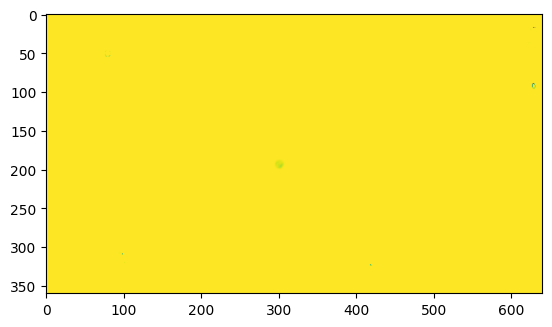

In [14]:
import matplotlib.pyplot as plt

plt.imshow(tf.reduce_max(tracknet_model(image), axis=-1, keepdims=True)[0])

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Ouvrir l'image depuis un fichier
image = Image.open(
    "/home/gaetan/iris/tiny-ball-detector/data/tennis/game6/Clip2/0576.jpg"
)


# Afficher l'image avec matplotlib
plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.axvline(x=191, color="red", linestyle="--", linewidth=1)
plt.axhline(y=511, color="red", linestyle="--", linewidth=1)
plt.axis("off")
plt.show()

In [ ]:
import numpy as np

a = np.zeros((10, 10))
a[5, 6] = 1
a

In [ ]:
a[3:8, 4:9]

In [ ]:
for i in data.take(1):
    print(i)

In [ ]:
gaussian_kernel_array = create_gaussian(20, 10)
gaussian_kernel_array

In [ ]:
for i in data.take(1):
    print(i)